# 미국 음식 리뷰 사이트(yelp) Review 평점 데이터

* word cloud 통해 중요 단어 확인
* 나이브베이즈분류 모델을 통해 리뷰의 별점 예측
* Data : yelp 음식 리뷰 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/haram4th/ablearn/main/yelp.csv', index_col = 0)
data

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
2967245,aMleVK0lQcOSNCs56_gSbg,miHaLnLanDKfZqZHet0uWw,Xp_cWXY5rxDLkX-wqUg-iQ,5,2015-09-30,LOVE the cheeses here. They are worth the pri...,0,0,1
4773684,Hs1f--t9JnVKW9A1U2uhKA,r_RUQSGZcd5bSgmTcS5IfQ,NuGZD3yBVqzpY1HuzT26mQ,5,2015-06-04,This has become our go-to sushi place. The sus...,0,0,0
1139855,i7aiPgNrNaFoM8J_j2OSyQ,zz7lojg6QdZbKFCJiHsj7w,ii8sAGBexBOJoYRFafF9XQ,1,2016-07-03,I was very disappointed with the hotel. The re...,2,1,1
3997153,uft6iMwNQh4I2UDpmbXggA,p_oXN3L9oi8nmmJigf8c9Q,r0j4IpUbcdC1-HfoMYae4w,5,2016-10-15,Love this place - super amazing - staff here i...,0,0,0
4262000,y9QmJ16mrfBZS6Td6Yqo0g,jovtGPaHAqP6XfG9BFwY7A,j6UwIfXrSkGTdVkRu7K6WA,5,2017-03-14,Thank you Dana!!!! Having dyed my hair black p...,0,0,0
...,...,...,...,...,...,...,...,...,...
1567641,t6YoK3vK6zTvodv-uAe5NA,eA-KLkSEq9RYt9-RfNZXCA,CbyXUOpH2TgFox46Be2LVQ,5,2013-08-01,I'm a sucker for places like this. Get me in f...,3,1,3
4910763,GFho96BYQZR7M75Qm-WHWA,KW_y5oQgAbifGQQA0cgCjQ,815I4_qtNd9Whd5joLZhAQ,1,2017-01-08,Extremely rude staff! Was told 4 min on a lar...,0,0,0
1036315,TEOItriKpYAQ9UyzWgIXDA,n4E9jR6ep7hcIi2esSCmNg,5Go1tSAVqNOXgvMr_fz9Sw,5,2015-06-15,I live in NYC and went to the RTR here in the ...,1,0,0
555962,cNCcrb_Vc0Tlx_06l1SQSw,NWW8yE6Bt4zENt4a0Et9Sg,yh5NcT0o9W_XdqdsEkxNZQ,5,2017-03-03,"If you are looking for a trainer, then look no...",0,0,0


우리가 주의깊게 볼 칼럼은 'stars' , 'text' 이다. 
* 'stars' : 별점, 총점
* 'text' : 리뷰

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 2967245 to 838267
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    10000 non-null  object
 1   user_id      10000 non-null  object
 2   business_id  10000 non-null  object
 3   stars        10000 non-null  int64 
 4   date         10000 non-null  object
 5   text         10000 non-null  object
 6   useful       10000 non-null  int64 
 7   funny        10000 non-null  int64 
 8   cool         10000 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 781.2+ KB


결측값은 없어보인다.

In [5]:
data.describe()

# 숫자 데이터만 불러옴

,stars,useful,funny,cool
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.012800,1.498800,0.464200,0.542500
std,1.724684,6.339355,1.926523,2.010273
min,1.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000
75%,5.000000,2.000000,0.000000,0.000000
max,5.000000,533.000000,83.000000,97.000000


In [6]:
data.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'date', 'text',
       'useful', 'funny', 'cool'],
      dtype='object')

In [7]:
data['review_id'].value_counts()

review_id
RF4EuYjqZwd5xRAO-A77tw    1
FqNjM3M5u-gw6xZQU4xg7g    1
UWQ22VXmfSrmlYvQ_eILEQ    1
nJIiRaOzCISJh0wLr_WnEQ    1
EsFgrR8sNBYVbSBkbTA60g    1
                         ..
y9QmJ16mrfBZS6Td6Yqo0g    1
uft6iMwNQh4I2UDpmbXggA    1
i7aiPgNrNaFoM8J_j2OSyQ    1
Hs1f--t9JnVKW9A1U2uhKA    1
aMleVK0lQcOSNCs56_gSbg    1
Name: count, Length: 10000, dtype: int64

In [8]:
data['user_id'].value_counts()

user_id
AsYBFmnMZMm9FOJi6o0seA    4
m96igVtonhN98jfF63lr8Q    3
3nDUQBjKyVor5wV0reJChg    3
uO1w3qNo21c1bVHHFTYW0w    3
z6gseuVl0cR7tRLQa_DXuQ    3
                         ..
sYi1ImYz0TaemnRweC_9zg    1
pCNiMG3Jnu7cY4nAI8Xswg    1
0m7f9Ojk_p6qwv7B8mbYZg    1
IwCU9CPrxdhjFBZbFIguAw    1
aTK01GfTMGyj4hTkQ7CeSw    1
Name: count, Length: 9799, dtype: int64

In [9]:
data['business_id'].value_counts()

business_id
4JNXUYY8wbaaDmk3BPzlWw    15
KskYqH1Bi7Z_61pH6Om8pg    11
RESDUcs7fIiihp38-d6_6g    10
hihud--QRriCYZw1zZvW4g     9
ty5KQYqYRxwXDG_e4pz-4w     8
                          ..
P3toQ5XEGw3WXMcekV5lMQ     1
HiecQOPC7Aj9sNg_h4gonw     1
L0aSDVHNXCl6sY4cfZQ-5Q     1
wFLt8DNjXITHusXlyBCAOQ     1
fUEHk00pkkuXaGdHQa2eKg     1
Name: count, Length: 8305, dtype: int64

* 'review_id'
* 'user_id'
* 'business_id'

이 3개의 칼럼은 삭제해도 됨. 나중에 삭제하기로 함. 

In [30]:
data['stars'].value_counts()

# 별 5개랑, 별 1개짜리만 있다. 매우 극단적이다. 

stars
5    7532
1    2468
Name: count, dtype: int64

<Axes: xlabel='stars'>

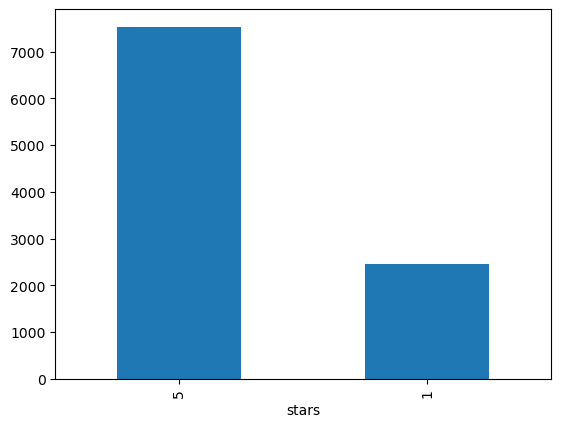

In [31]:
data['stars'].value_counts().plot(kind='bar')

In [32]:
data['text'].value_counts()

# 고객의 리뷰

text
First off, they are nice people, Buuut, I was unimpressed, and it was expensive... The food, NO THANKS!  the pita meat was reheated,  tasted old, shredded lettuce out of a bag, old tomato, just not $9.00 worth of pita in my opinion, and that was just the pita, they wanted 2 bucks for fries, ahhhh, no. Save your coin and go somewhere else.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [33]:
data['text']

2967245    LOVE the cheeses here.  They are worth the pri...
4773684    This has become our go-to sushi place. The sus...
1139855    I was very disappointed with the hotel. The re...
3997153    Love this place - super amazing - staff here i...
4262000    Thank you Dana!!!! Having dyed my hair black p...
                                 ...                        
1567641    I'm a sucker for places like this. Get me in f...
4910763    Extremely rude staff!  Was told 4 min on a lar...
1036315    I live in NYC and went to the RTR here in the ...
555962     If you are looking for a trainer, then look no...
838267     Awesome food. Awesome beer. Awesome service. N...
Name: text, Length: 10000, dtype: object

In [34]:
data.iloc[0]['text']

'LOVE the cheeses here.  They are worth the price.  Great for finding treats for a special dinner or picnic.  Nice on sample days. Yum!!! Top quality meats. Nice selection of non brand frozen veggies.  Veggie chips are mega tasty.  Always quick and friendly check out.  Produce not as stellar as it once was, but also not finding better in Madison.'

In [35]:
data.iloc[1]['text']

'This has become our go-to sushi place. The sushi is always fresh and delicious. We get the $30 sushi platter, which is perfect for two people. The service is always fast, and the servers are pleasant. They give you salads and potatoes while you wait for your food, which is a nice touch. After your meal, they bring you little bottles of korean yoghurt which is also delicious.'

In [38]:
data['text_len'] = data['text'].apply(len)

# 'text_len' 새로운 칼럼 만들기

In [39]:
data['text_len']

2967245     347
4773684     377
1139855     663
3997153     141
4262000     455
           ... 
1567641     779
4910763     268
1036315    1288
555962     1160
838267      137
Name: text_len, Length: 10000, dtype: int64

'text_len' 칼럼을 하나 더 추가했다. 리뷰 글자 개수다. 

/tmp/ipykernel_33381/1175562438.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['text_len'])


<Axes: xlabel='text_len', ylabel='Density'>

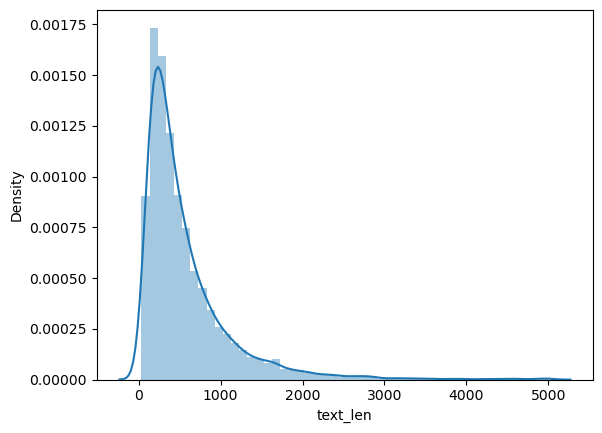

In [40]:
sns.distplot(data['text_len'])

# 분포 눈으로 확인하기 
# 0 ~ 1000개 사이가 가장 많다. 

In [41]:
data['useful'].value_counts()

useful
0      5254
1      2094
2      1012
3       580
4       328
5       176
6       116
7        90
8        59
9        47
10       43
11       32
13       25
12       19
14       18
15       14
19       12
21        9
16        9
18        8
20        8
17        7
22        5
26        4
34        3
29        3
32        2
23        2
28        2
33        2
25        1
71        1
27        1
97        1
50        1
533       1
41        1
36        1
30        1
42        1
56        1
48        1
35        1
24        1
38        1
99        1
49        1
Name: count, dtype: int64

## Word Cloud 통해 중요 단어 확인하기 

In [42]:
data['text']

2967245    LOVE the cheeses here.  They are worth the pri...
4773684    This has become our go-to sushi place. The sus...
1139855    I was very disappointed with the hotel. The re...
3997153    Love this place - super amazing - staff here i...
4262000    Thank you Dana!!!! Having dyed my hair black p...
                                 ...                        
1567641    I'm a sucker for places like this. Get me in f...
4910763    Extremely rude staff!  Was told 4 min on a lar...
1036315    I live in NYC and went to the RTR here in the ...
555962     If you are looking for a trainer, then look no...
838267     Awesome food. Awesome beer. Awesome service. N...
Name: text, Length: 10000, dtype: object

Word Cloud 할 때, 느낌표! 같은 불필요한 텍스트를 제거하자. 

In [43]:
import string

In [45]:
data.iloc[0]['text']

# text 칼럼의 첫번째 데이터 불러오기  

'LOVE the cheeses here.  They are worth the price.  Great for finding treats for a special dinner or picnic.  Nice on sample days. Yum!!! Top quality meats. Nice selection of non brand frozen veggies.  Veggie chips are mega tasty.  Always quick and friendly check out.  Produce not as stellar as it once was, but also not finding better in Madison.'

In [46]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
data['text'][:2]

2967245    LOVE the cheeses here.  They are worth the pri...
4773684    This has become our go-to sushi place. The sus...
Name: text, dtype: object

In [76]:
def remove_punc(x):
    cleaned = []
    for i in x.split() :
        if i not in string.punctuation:
            cleaned.append(i)
    cleaned = " ".join(cleaned)
    cleaned = cleaned.replace("   "," ").replace("  ", " ").replace("\n", "").replace("\t","").replace("\r","")
    
    return cleaned 

In [77]:
data['text'].apply(remove_punc)

2967245    LOVE the cheeses here. They are worth the pric...
4773684    This has become our go-to sushi place. The sus...
1139855    I was very disappointed with the hotel. The re...
3997153    Love this place super amazing staff here is al...
4262000    Thank you Dana!!!! Having dyed my hair black p...
                                 ...                        
1567641    I'm a sucker for places like this. Get me in f...
4910763    Extremely rude staff! Was told 4 min on a larg...
1036315    I live in NYC and went to the RTR here in the ...
555962     If you are looking for a trainer, then look no...
838267     Awesome food. Awesome beer. Awesome service. N...
Name: text, Length: 10000, dtype: object

## 상투적인 언어 제거하기
* nltk 라이브러리로 상투적인 언어(stopwords) 제거하기

In [24]:
# !pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.5/776.5 kB 21.3 MB/s eta 0:00:00


In [25]:
from nltk.corpus import stopwords

In [26]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
print(stopwords.words('english'))

#  말뭉치 : 별 뜻없는 말들 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
data['text'].iloc[0]

In [33]:
for i in data['text'].iloc[0].split():
    if i not in stopwords.words('english'):
        print(i)

# 단어별로 쪼개짐 

LOVE
the
cheeses
here.
They
are
worth
the
price.
Great
for
finding
treats
for
a
special
dinner
or
picnic.
Nice
on
sample
days.
Yum!!!
Top
quality
meats.
Nice
selection
of
non
brand
frozen
veggies.
Veggie
chips
are
mega
tasty.
Always
quick
and
friendly
check
out.
Produce
not
as
stellar
as
it
once
was,
but
also
not
finding
better
in
Madison.


## 자주 등장하는 단어 빈도 분석

In [52]:
whole_words = []
for words in data['text']:
    for word in words.split():
        whole_words.append(word)

In [53]:
len(whole_words)

1056880

In [54]:
from nltk.probability import FreqDist

In [55]:
FreqDist(whole_words)

FreqDist({'the': 41231, 'and': 37448, 'I': 27997, 'to': 26610, 'a': 24548, 'was': 16902, 'of': 14091, 'is': 12320, 'for': 11539, 'in': 11338, ...})

<Axes: xlabel='Samples', ylabel='Counts'>

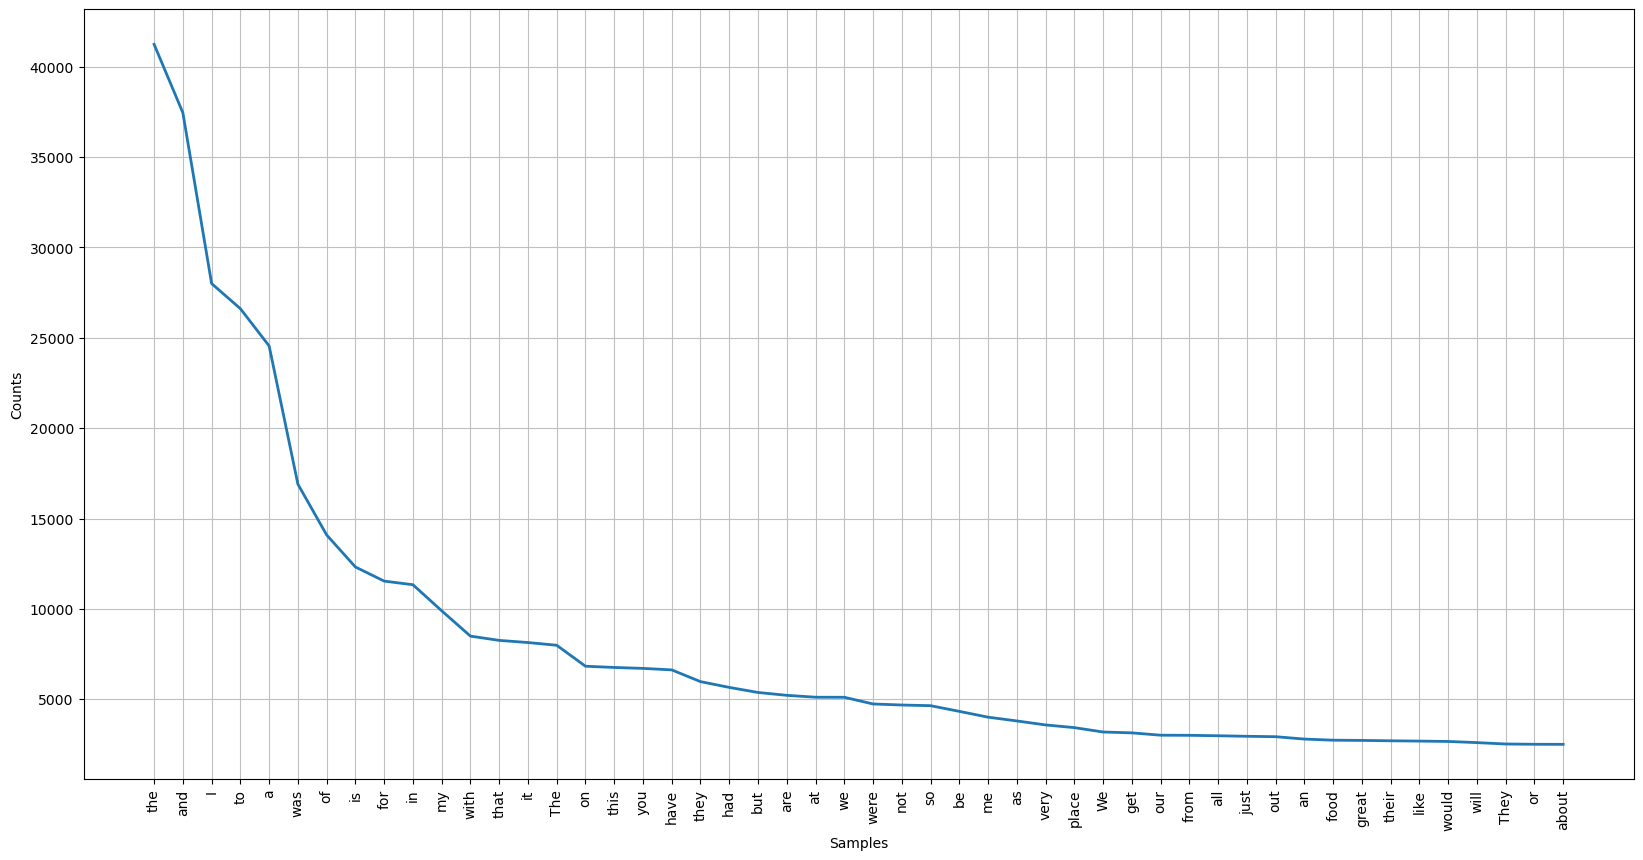

In [57]:
plt.figure(figsize = (20,10))
FreqDist(whole_words).plot(50)

## Word Cloud 만들기

In [58]:
# !pip3 install wordcloud

In [59]:
from wordcloud import WordCloud

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

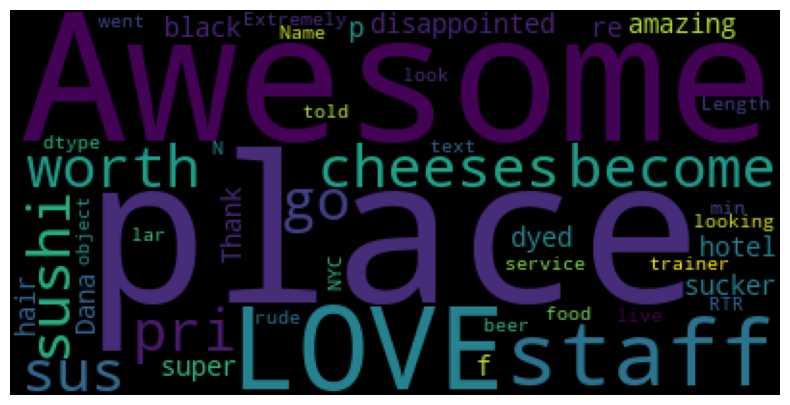

In [60]:
wc = WordCloud().generate(str(data['text']))
plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis('off') 

# x축 & y축의 숫자는 지우기

In [62]:
data['stars'].value_counts()

stars
5    7532
1    2468
Name: count, dtype: int64

별점 5점짜리와, 별점 1점짜리를 나눠서 wordcloud 를 나눠서 만들기

In [63]:
data[data['stars'] == 5]

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,text_len
2967245,aMleVK0lQcOSNCs56_gSbg,miHaLnLanDKfZqZHet0uWw,Xp_cWXY5rxDLkX-wqUg-iQ,5,2015-09-30,LOVE the cheeses here. They are worth the pri...,0,0,1,347
4773684,Hs1f--t9JnVKW9A1U2uhKA,r_RUQSGZcd5bSgmTcS5IfQ,NuGZD3yBVqzpY1HuzT26mQ,5,2015-06-04,This has become our go-to sushi place. The sus...,0,0,0,377
3997153,uft6iMwNQh4I2UDpmbXggA,p_oXN3L9oi8nmmJigf8c9Q,r0j4IpUbcdC1-HfoMYae4w,5,2016-10-15,Love this place - super amazing - staff here i...,0,0,0,141
4262000,y9QmJ16mrfBZS6Td6Yqo0g,jovtGPaHAqP6XfG9BFwY7A,j6UwIfXrSkGTdVkRu7K6WA,5,2017-03-14,Thank you Dana!!!! Having dyed my hair black p...,0,0,0,455
1272104,KTc5v8oD2FvmA_B9qq0VHg,H1XQ1Gj3jHD0WyAe7ZP2jA,BskUTTscZ1XGa9ev7TlfeQ,5,2016-01-10,I went with a small group for New Year's Eve a...,0,0,0,387
...,...,...,...,...,...,...,...,...,...,...
4415064,_N4BZFqWUVmCQIAozVcIfw,SW1IjnpGVMTqxaJV4SuGaQ,yOTAL3j1ymB6kVEmK0YLHQ,5,2017-01-26,Linda is so talented. Lashes last such a long ...,0,0,0,143
1567641,t6YoK3vK6zTvodv-uAe5NA,eA-KLkSEq9RYt9-RfNZXCA,CbyXUOpH2TgFox46Be2LVQ,5,2013-08-01,I'm a sucker for places like this. Get me in f...,3,1,3,779
1036315,TEOItriKpYAQ9UyzWgIXDA,n4E9jR6ep7hcIi2esSCmNg,5Go1tSAVqNOXgvMr_fz9Sw,5,2015-06-15,I live in NYC and went to the RTR here in the ...,1,0,0,1288
555962,cNCcrb_Vc0Tlx_06l1SQSw,NWW8yE6Bt4zENt4a0Et9Sg,yh5NcT0o9W_XdqdsEkxNZQ,5,2017-03-03,"If you are looking for a trainer, then look no...",0,0,0,1160


In [65]:
good = data[data['stars'] == 5]['text']   # 별점 5점짜리만 필터링해서 나타내기 
bad = data[data['stars'] == 1]['text']   # 별점 1점짜리만 필터링해서 나타내기 

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

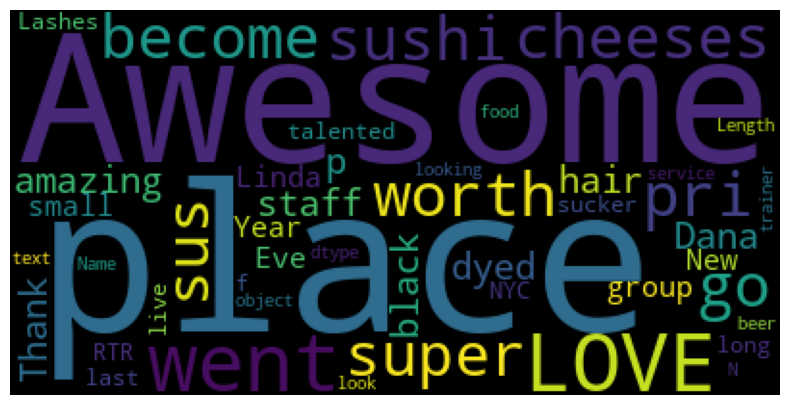

In [66]:
# 별점 5점짜리 WordCloud

wc = WordCloud().generate(str(good))
plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis('off')   # x축 & y축의 숫자는 지우기

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

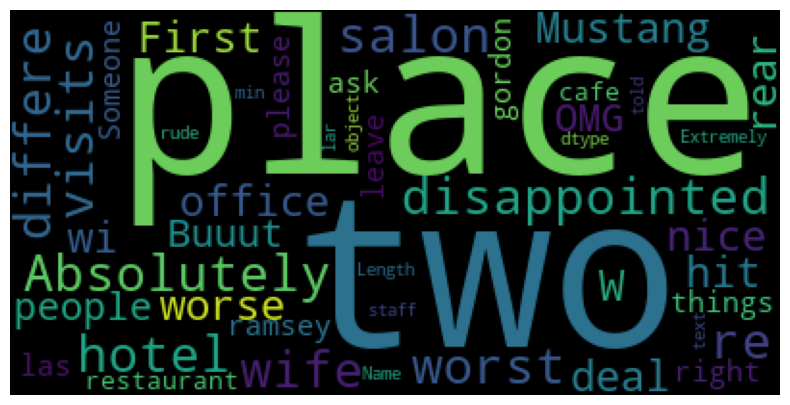

In [67]:
# 별점 1점짜리 WordCloud

wc = WordCloud().generate(str(bad))
plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis('off')   # x축 & y축의 숫자는 지우기

## 나이브베이즈분류 모델을 통해 리뷰의 별점 예측하기 
나이브베이즈를 이용해서 감성분석하기 

text 를 벡터화하기 CountVectorizer
* 단어의 빈도를 세고 숫자로 변형

In [72]:
X = data['text']
y = data['stars']

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

In [74]:
cv = CountVectorizer()
X_vec = cv.fit_transform(X['text'])
X_vec

KeyError: 'text'

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_vec, y, test_size=0.4, random_state=7)
X_valid, X_test, y_valid, y_test = trian_test_split(X_valid, y_valid, test_size=0.5, random_state=7)

In [ ]:
from sklearn.naive_bayes import MultinominalNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
mnb = MultinominalNB()
mnb.fit(X_train, y_train)
pred = mnb.predict(X_valid)
print(accuracy_score(y_valid, pred))
print(classification_report(y_valid, pred))

In [75]:
# !pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 28.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 25.1 MB/s eta 0:00:0000:0100:01


In [ ]:
from xgboost import XGBClassifier 

In [ ]:
xgb = XGBClassifier(n_estimators = 500, max_depth=-1, random_state=7)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_valid)
print(accuracy_score(y_valid, pred))
print(classification_report(y_valid, pred))